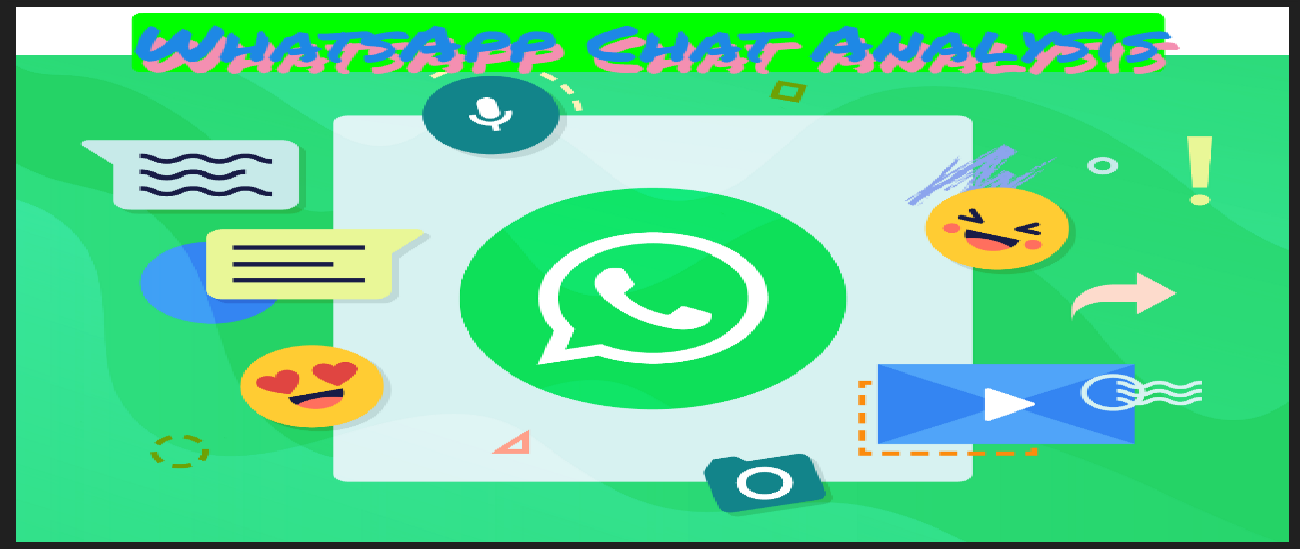

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import emoji
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**When if import file directly to Jupyter, it will look like below,**
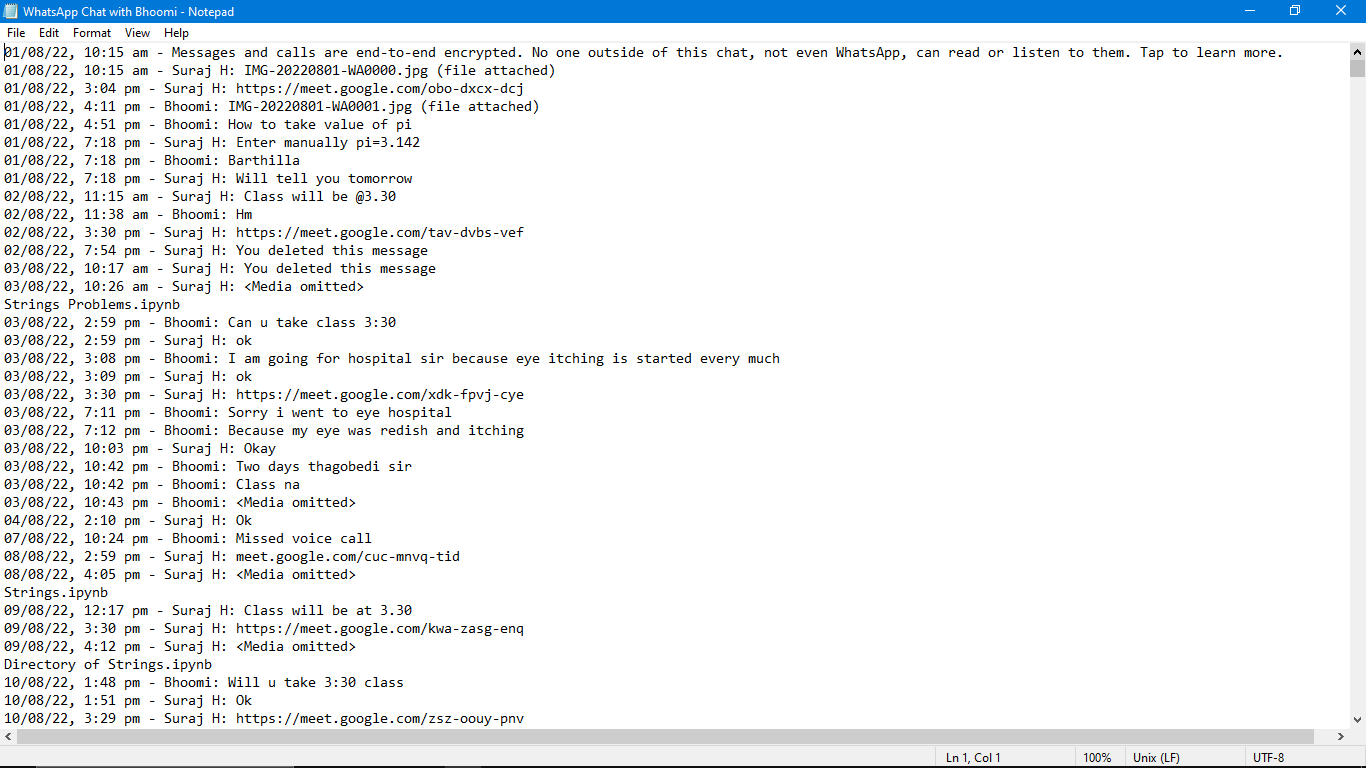

**Hence it is required to do some preprocessing.**

### Create function that create exact Date time format as per our requirement
### Create function that seperate Message Sender
### Create function which return message sent by users

In [2]:
def datetime(s):
    time_pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(time_pattern, s)
    if result:
        return True
    return False

def search_sender(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def message_finder(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if search_sender(message):
        splitmessage = message.split(": ")
        sender = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        sender= None
    return date, time, sender, message

In [3]:
data = []
conversation = 'D:\PGP IN DATA SCIENCE with Careerera\\Data Sets\\WhatsApp Chat with Bhoomi.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, sender = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if datetime(line):
            if len(messageBuffer) > 0:
                data.append([date, time, sender, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, sender, message = message_finder(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [4]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Sent_by', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
df

Date      Time  Sent_by  \
0    2022-01-08  10:15 am  Suraj H   
1    2022-01-08   3:04 pm     None   
2    2022-01-08   4:11 pm   Bhoomi   
3    2022-01-08   4:51 pm   Bhoomi   
4    2022-01-08   7:18 pm  Suraj H   
...         ...       ...      ...   
1479 2023-01-27   1:29 pm   Bhoomi   
1480 2023-01-27   1:29 pm   Bhoomi   
1481 2023-01-27   2:00 pm  Suraj H   
1482 2023-01-30  10:37 am  Suraj H   
1483 2023-01-30  11:05 am   Bhoomi   

                                            Message  
0           IMG-20220801-WA0000.jpg (file attached)  
1     Suraj H: https://meet.google.com/obo-dxcx-dcj  
2           IMG-20220801-WA0001.jpg (file attached)  
3                           How to take value of pi  
4                           Enter manually pi=3.142  
...                                             ...  
1479                                            Sry  
1480        Current Ella laptop nalli charge rlilla  
1481                           Okay okay no problem  
1482                    When you take class today ?  
1483                                 Evening. Class  

[1484 rows x 4 columns]

### Total Message sent by each user in conversation

In [5]:
print("Total Messages in Conversation",df.shape[0])

Total Messages in Conversation 1484


In [6]:
msg_by_each_user=df['Sent_by'].value_counts()
msg_by_each_user

Bhoomi     855
Suraj H    592
Name: Sent_by, dtype: int64

In [7]:
fig=px.bar(data_frame=msg_by_each_user,
              x=msg_by_each_user.index,
              y=msg_by_each_user.values,
              title="Messages by Each user in converation")
fig.show()

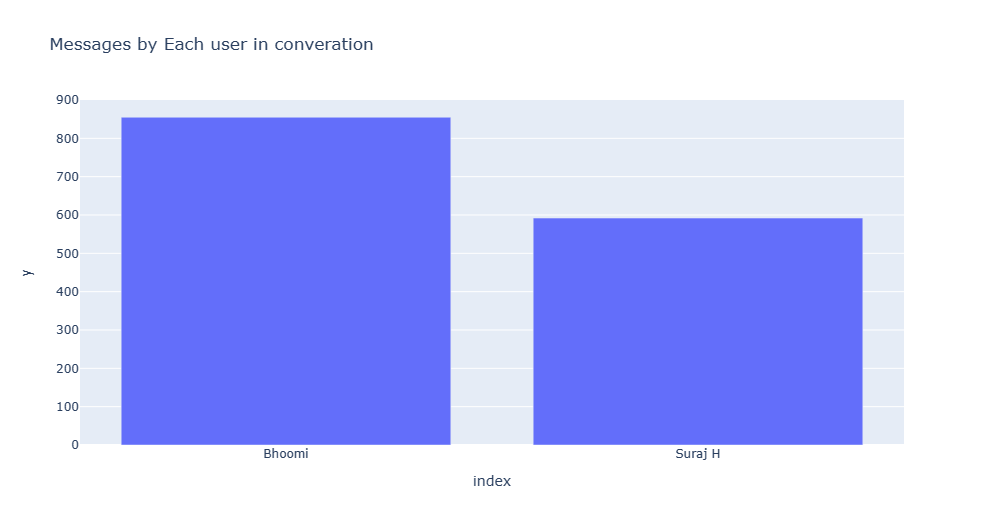

### Media sent in converasation

In [8]:
media=df[df['Message']=='<Media omitted>'].shape[0]
print("Total Media Messages are,", media)

Total Media Messages are, 2


### What kind of Emoji users used frequently

In [9]:
def split_count(text):
    emoji_list = []
    data = re.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)
df

Date      Time  Sent_by  \
0    2022-01-08  10:15 am  Suraj H   
1    2022-01-08   3:04 pm     None   
2    2022-01-08   4:11 pm   Bhoomi   
3    2022-01-08   4:51 pm   Bhoomi   
4    2022-01-08   7:18 pm  Suraj H   
...         ...       ...      ...   
1479 2023-01-27   1:29 pm   Bhoomi   
1480 2023-01-27   1:29 pm   Bhoomi   
1481 2023-01-27   2:00 pm  Suraj H   
1482 2023-01-30  10:37 am  Suraj H   
1483 2023-01-30  11:05 am   Bhoomi   

                                            Message emoji  
0           IMG-20220801-WA0000.jpg (file attached)    []  
1     Suraj H: https://meet.google.com/obo-dxcx-dcj    []  
2           IMG-20220801-WA0001.jpg (file attached)    []  
3                           How to take value of pi    []  
4                           Enter manually pi=3.142    []  
...                                             ...   ...  
1479                                            Sry    []  
1480        Current Ella laptop nalli charge rlilla    []  
1481                           Okay okay no problem    []  
1482                    When you take class today ?    []  
1483                                 Evening. Class    []  

[1484 rows x 5 columns]

In [10]:
emojis = sum(df['emoji'].str.len())
print("Total Number of Emojis used", emojis)

Total Number of Emojis used 128


#### Message, Link & Emoji count

In [11]:
url=r'(https?://\S+)'
df['urls']=df['Message'].apply(lambda x: re.findall(url, x))
print("URL shared between users are", sum(df['urls'].str.len()))

URL shared between users are 28


In [12]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Suraj H", "Bhoomi"]

print("WhatsApp Message Analysis")
for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Sent_by"] == l[i]]
    # req_df will contain messages of only one particular user
    print(f'Stats of {l[i]} -')
    # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Average Words per message', words_per_message)
    #media conists of media messages
    media = media_messages_df[media_messages_df['Sent_by'] == l[i]].shape[0]
    print('Media Messages Sent', media)
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
    print("****************************************************************")

WhatsApp Message Analysis
Stats of Suraj H -
Messages Sent 591
Average Words per message 4.380710659898477
Media Messages Sent 1
Emojis Sent 61
****************************************************************
Stats of Bhoomi -
Messages Sent 854
Average Words per message 2.610070257611241
Media Messages Sent 1
Emojis Sent 67
****************************************************************


### Total Emoji List

In [13]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)  

emoji_df=pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

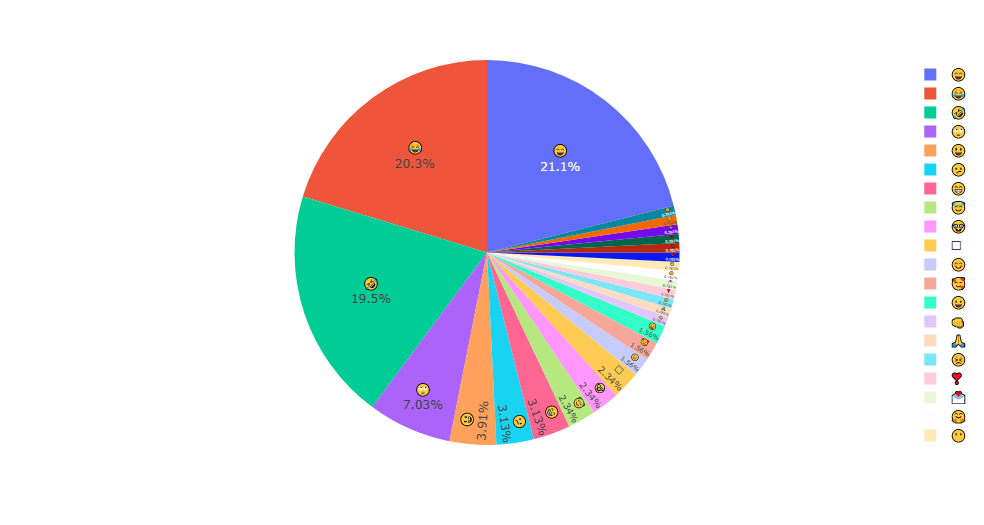

### Emoji Sent by Suraj H

In [14]:
messages_df_suraj=messages_df[messages_df['Sent_by']=='Suraj H']

In [15]:
total_emojis_list = list(set([a for b in messages_df_suraj.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df_suraj.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)  

emoji_df=pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

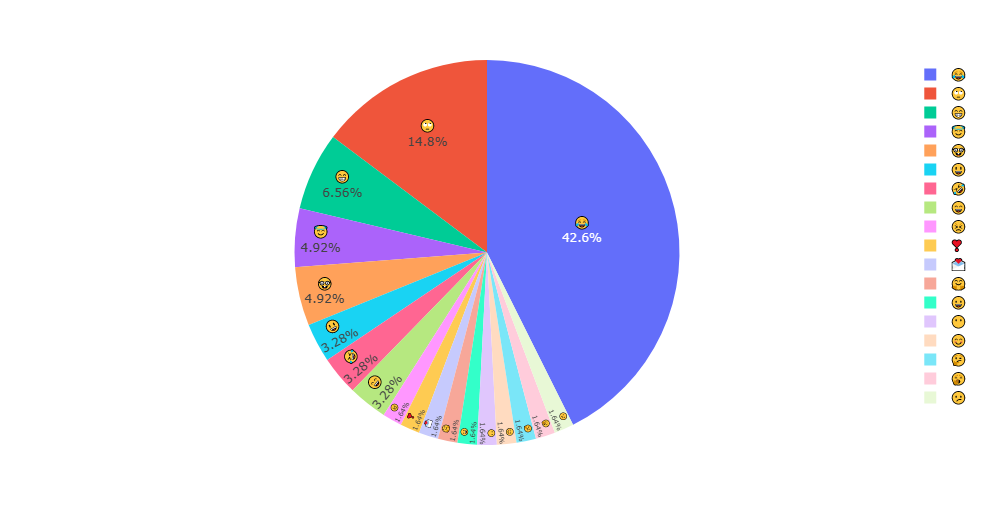

### Emoji Sent by Bhoomi

In [16]:
messages_df_bhoomi=messages_df[messages_df['Sent_by']=='Bhoomi']

In [17]:
total_emojis_list = list(set([a for b in messages_df_bhoomi.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df_bhoomi.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)  

emoji_df=pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

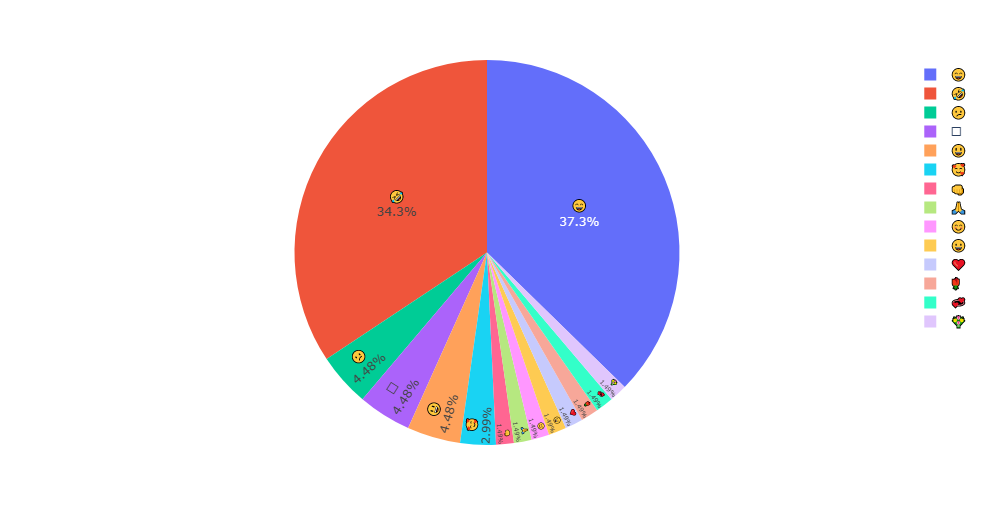

### Most Used Words in WhatsApp Conversation

There are 29400 words in all the messages.


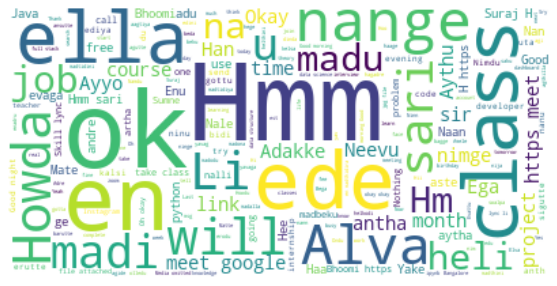

In [18]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Words used by Suraj H in conversation

There are 14777 words in all the messages.


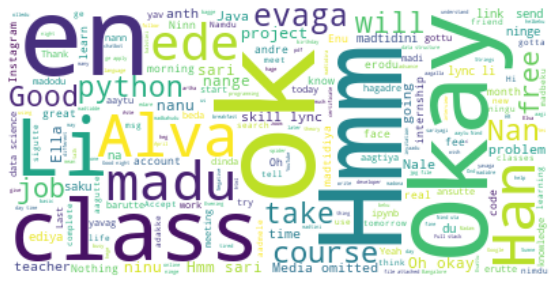

In [19]:
text = " ".join(review for review in messages_df_suraj.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Words used by Bhoomi in conversation

There are 13007 words in all the messages.


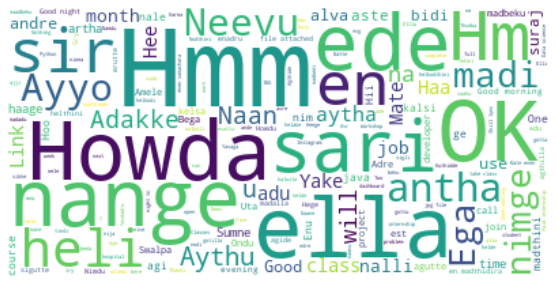

In [20]:
text = " ".join(review for review in messages_df_bhoomi.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Summary:
**Python Allow us to analyse Whatsapp Conversation using "emoji" & "regex" package. Further we can do sentiment analysis too.**